# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [4]:
train_images.shape
# Hay 60mil imagenes en el train

(60000, 28, 28)

In [5]:
test_images.shape
# Hay 10mil imagenes en el train

(10000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_labels.shape

(10000,)

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

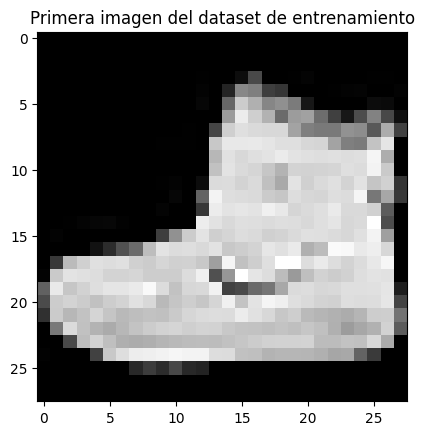

In [8]:
plt.imshow(train_images[0], cmap='gray')  # Ajusta el mapa de color según tu dataset
plt.title('Primera imagen del dataset de entrenamiento')
plt.show()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [11]:
train_images[0].max()

255.0

In [12]:
test_images[0].max()

255.0

In [13]:
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255

In [14]:
np.mean(train_images)

0.2860402

In [15]:
np.mean(test_images)

0.28684944

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

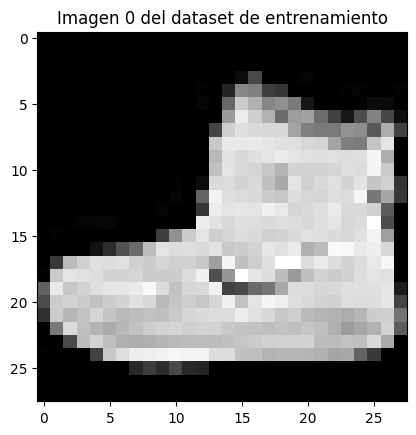

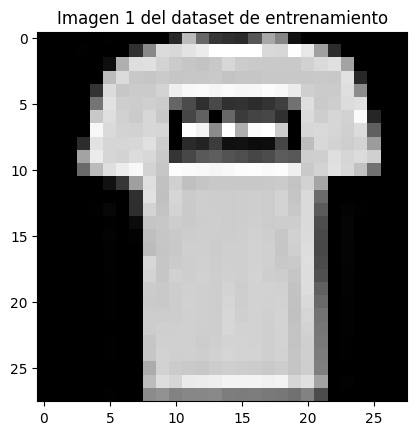

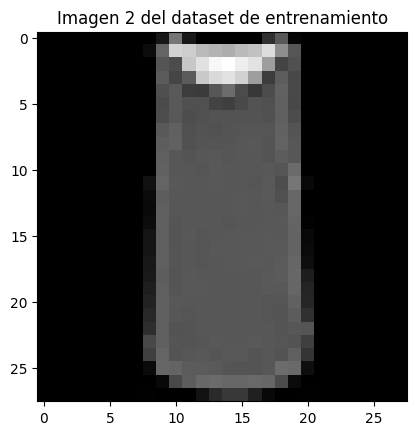

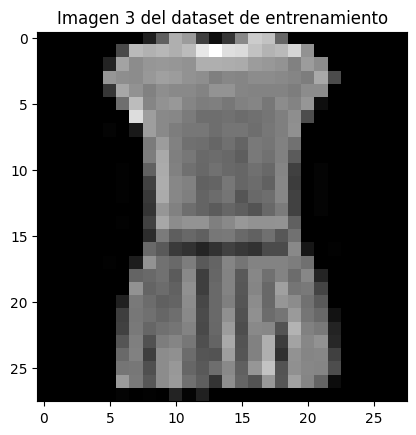

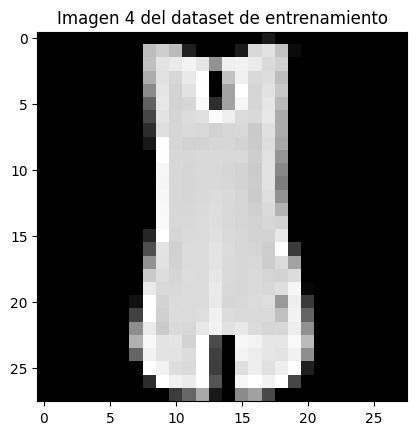

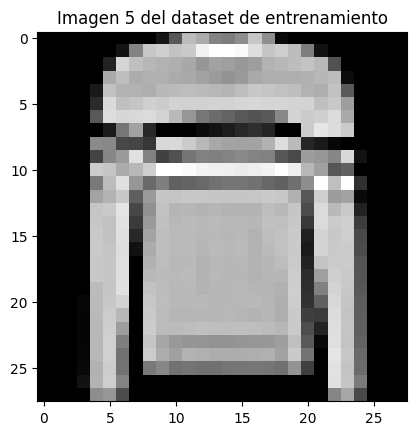

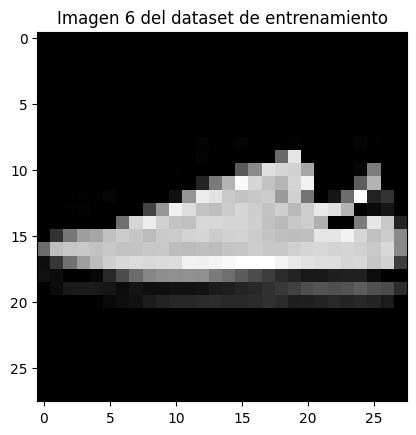

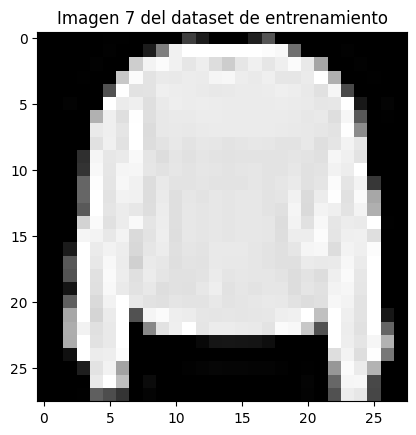

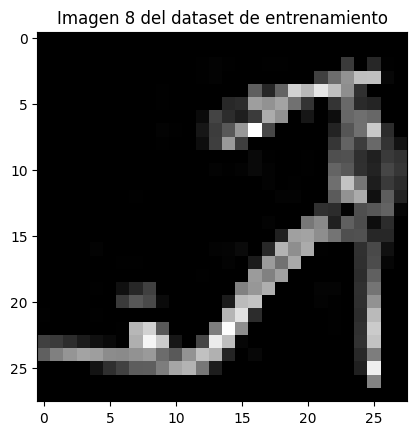

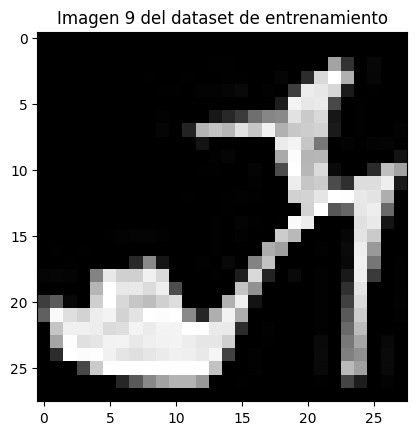

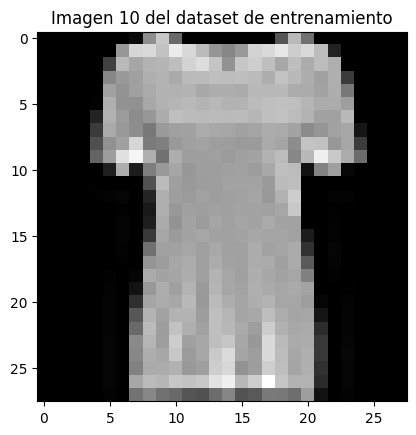

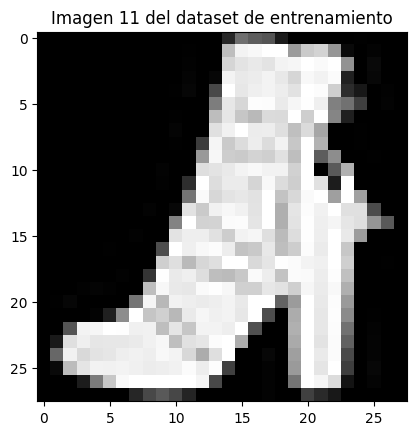

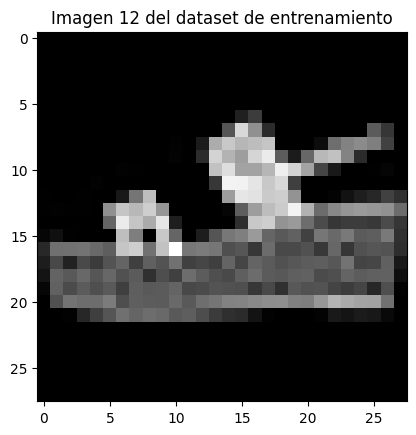

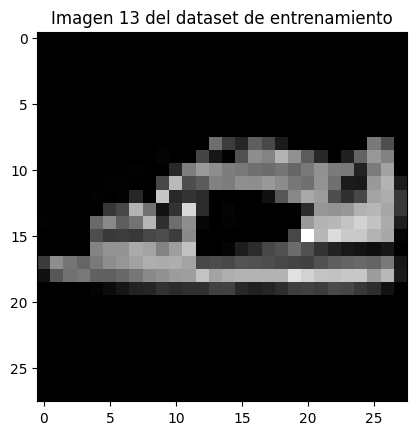

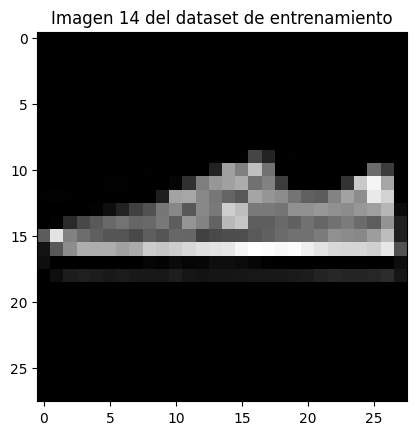

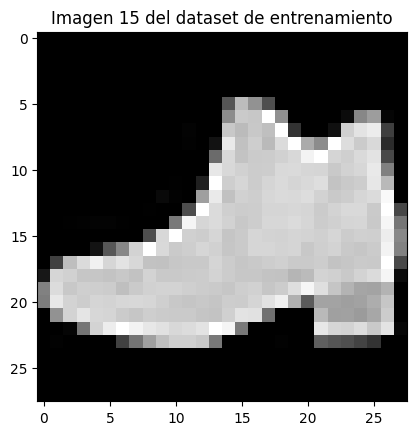

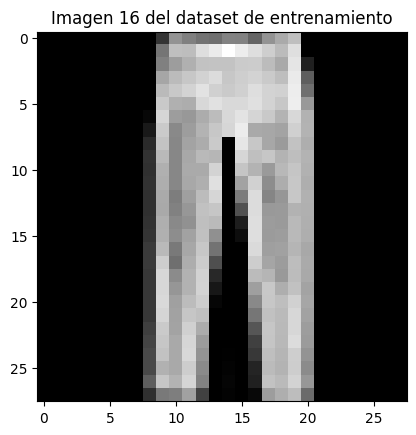

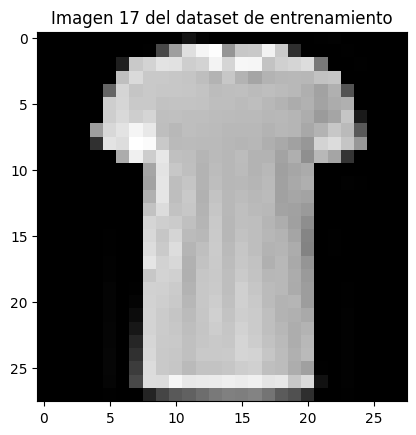

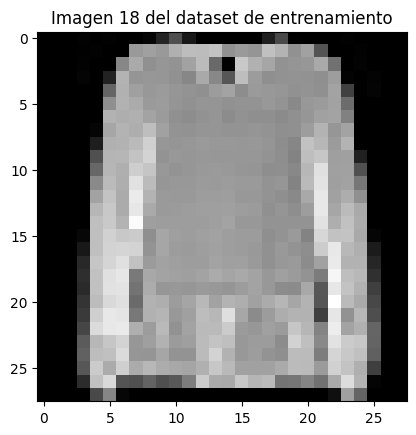

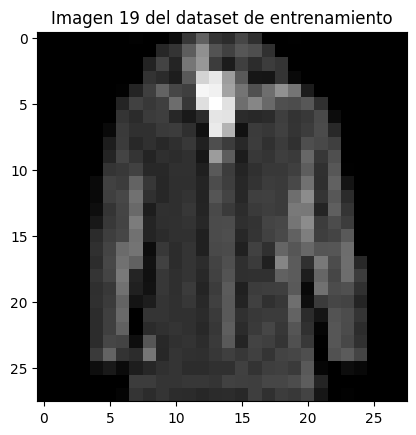

In [18]:
for i in range(20):
    plt.imshow(train_images[i], cmap='gray')  # Ajusta el mapa de color según tu dataset
    plt.title(f'Imagen {i} del dataset de entrenamiento')
    plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

In [23]:
X_val = train_images[-10000:]
y_val = train_labels[-10000:]

train_images = train_images[:-10000]
train_labels = train_labels[:-10000]

### Configurar las Capas
Construye todas las capas del modelo.

In [24]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [25]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [26]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [29]:
history = model.fit(
    train_images,
    train_labels,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 3s 8ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3697 - val_sparse_categorical_accuracy: 0.8689
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3363 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3839 - val_sparse_categorical_accuracy: 0.8649
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3338 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.3809 - val_sparse_categorical_accuracy: 0.8653
Epoch 4/50
391/391 [==============================] - 5s 14ms/step - loss: 0.3315 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.3675 - val_sparse_categorical_accuracy: 0.8714
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3294 - sparse_categorical_accuracy: 0.8825 - val_loss: 0.3661 - val_sparse_categorical_accuracy: 0.8688
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.3288 - sparse_categoric

In [30]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [0.33901020884513855,
  0.3363123834133148,
  0.33375272154808044,
  0.33146950602531433,
  0.3294191062450409,
  0.32878565788269043,
  0.32460710406303406,
  0.32234495878219604,
  0.3198498487472534,
  0.31736236810684204,
  0.3152853846549988,
  0.31275704503059387,
  0.3104687035083771,
  0.3090435266494751,
  0.3066596984863281,
  0.30508342385292053,
  0.30198466777801514,
  0.30138295888900757,
  0.30009591579437256,
  0.29646778106689453,
  0.29601556062698364,
  0.2924898564815521,
  0.29170408844947815,
  0.2897070348262787,
  0.28797051310539246,
  0.28638139367103577,
  0.2851737439632416,
  0.28384578227996826,
  0.281283974647522,
  0.2788989245891571,
  0.27739620208740234,
  0.27698662877082825,
  0.2743453085422516,
  0.2721180021762848,
  0.2714674770832062,
  0.269504189491272,
  0.26704928278923035,
  0.26584839820861816,
  0.26501795649528503,
  0.2633114159107208,
  0.2617277204990387,
  0.26085296273231506,
  0.25819307565689087,
  0.25682875514030457,


## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [31]:
results = model.evaluate(test_images, test_labels)
results

313/313 [==============================] - 1s 4ms/step - loss: 0.3460 - sparse_categorical_accuracy: 0.8750


[0.3460315763950348, 0.875]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

C:\Users\Sandia\AppData\Local\Temp\ipykernel_2444\3446505541.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


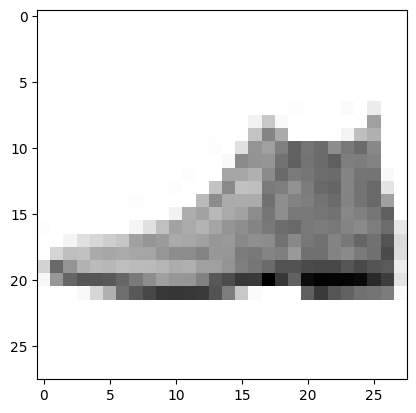

In [33]:
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [34]:
test_labels[0]

9

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [35]:
predictions = model.predict(test_images[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 250ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.026, 0.   , 0.016, 0.001,
        0.958]], dtype=float32)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [36]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.